In [84]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [85]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [86]:
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split

In [87]:
normal_cells=os.listdir(r'F:\AI & ML\CNN\BrainTumor\no')

In [88]:
print(normal_cells[0:5])
print(normal_cells[-5:])

['1 no.jpeg', '10 no.jpg', '11 no.jpg', '12 no.jpg', '13 no.jpg']
['No18.jpg', 'No19.jpg', 'No20.jpg', 'No21.jpg', 'No22.jpg']


In [89]:
tumor_cells=os.listdir(r'F:\AI & ML\CNN\BrainTumor\yes')

In [90]:
print(tumor_cells[:5])

['Y1.jpg', 'Y10.jpg', 'Y100.JPG', 'Y101.jpg', 'Y102.jpg']


In [91]:
len(tumor_cells),len(normal_cells)

(155, 98)

# Assign the labels to the normal and tumor cells

#### Normal Cells -> 0
#### Tumor Cells-> 1

In [92]:
normal_labels=[0]*98
tumor_labels=[1]*155

In [93]:
print(normal_labels[0:5])
print(tumor_labels[0:5])

[0, 0, 0, 0, 0]
[1, 1, 1, 1, 1]


# Combine the lebels

In [94]:
label=normal_labels+tumor_labels

In [95]:
print(type(label))
len(label)

<class 'list'>


253

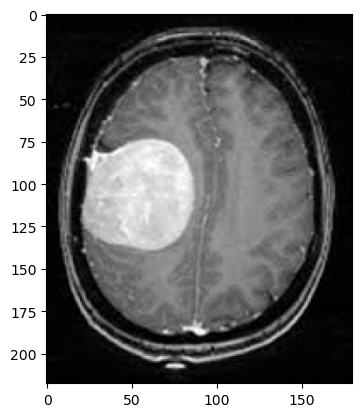

In [96]:
img=r'F:\AI & ML\CNN\BrainTumor\yes\Y1.jpg'
im=Image.open(img)
plt.imshow(im)
plt.show()

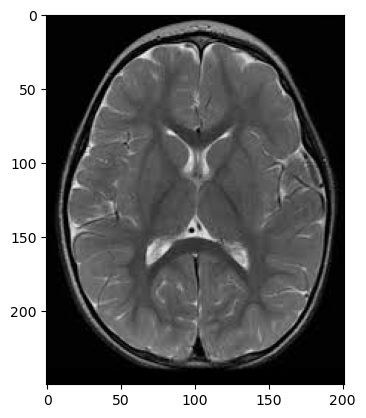

In [97]:
img=r'F:\AI & ML\CNN\BrainTumor\no\4 no.jpg'
im=Image.open(img)
plt.imshow(im)
plt.show()

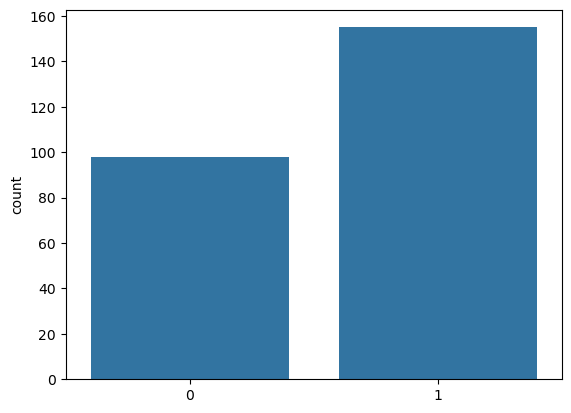

In [98]:
import seaborn as sns
sns.countplot(x=label)
plt.show()

In [99]:
data=[]

# Reshape the images

In [100]:
normal_cells_path = r'F:\AI & ML\CNN\BrainTumor\no'

for files in normal_cells:
    image_path = os.path.join(normal_cells_path, files)
    image=Image.open(image_path)
    image=image.resize((128,128))
    image=image.convert('RGB')
    image=np.array(image)
    data.append(image)

In [101]:
len(data)

98

In [102]:
tumo_cells_path=r'F:\AI & ML\CNN\BrainTumor\yes'
for files in tumor_cells:
    image_path = os.path.join(tumo_cells_path, files)
    image=Image.open(image_path)
    image=image.resize((128,128))
    image=image.convert('RGB')
    image=np.array(image)
    data.append(image)

In [103]:
# data=data.clear()

In [104]:
len(data)

253

In [105]:
data

[array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8),
 array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 

In [106]:
data[0].shape

(128, 128, 3)

In [107]:
type(data)

list

In [108]:
type(label)

list

# Convert both into numpy array

In [109]:
X=np.array(data)
y=np.array(label)

In [110]:
type(X),type(y)

(numpy.ndarray, numpy.ndarray)

# Normalize the data set

In [111]:
X=X/255
y=y/255

# Split the dataset

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101)

In [114]:
X_train.shape,X_test.shape

((202, 128, 128, 3), (51, 128, 128, 3))

# Model Building

In [115]:
import tensorflow as tf
from tensorflow.keras.models import  Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization,Conv2D,MaxPooling2D,Flatten

In [116]:
import keras_tuner
from tensorflow import keras

In [117]:
def model_building(hp):
    model=Sequential([
        Conv2D(
            filters=hp.Int('conv_1_filtter',min_value=32,max_value=128,step=16),
            kernel_size=hp.Choice('conv_1_kernel',values=[3,5]),
            activation='relu',
            input_shape=(128,128,3)
        ),
        BatchNormalization(),
        MaxPooling2D(pool_size=hp.Choice('max_1',values=[2,3,5])),
        Conv2D(
            filters=hp.Int('conv_2_filter',min_value=48,max_value=64,step=2),
            kernel_size=hp.Choice('conv_2_kernel',values=[3,5]),
            activation='relu',
        ),
        BatchNormalization(),
        MaxPooling2D(pool_size=hp.Choice('max_2',values=[2,3,5])),
        Flatten(),
        Dense(
            units=hp.Int('dense_1',min_value=64,max_value=128,step=8),
            activation='relu'
        ),
        Dense(1,activation='sigmoid')
    ])
    
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='binary_crossentropy',
              metrics=['accuracy']),
    
    return model
    

In [118]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [119]:
tuner_search=RandomSearch(model_building,objective='val_accuracy',max_trials=5,directory='output',project_name="BrainTumor")

Reloading Tuner from output\BrainTumor\tuner0.json


In [120]:
tuner_search.search(X_train,y_train,epochs=10,validation_split=0.1)

# Not perform well on hyperparamter please invoke model manually

In [121]:
model_one=Sequential()

In [122]:
num_of_classes=2

model_one=Sequential()

model_one.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model_one.add(MaxPooling2D(pool_size=(2,2)))

model_one.add(Flatten())

model_one.add(Dense(128, activation='relu'))

model_one.add(Dense(num_of_classes, activation='sigmoid'))

In [123]:
model_one.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [124]:
history=model_one.fit(X_train,y_train,validation_split=0.1,epochs=50,verbose=1)

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.4097 - loss: 0.2387 - val_accuracy: 0.4762 - val_loss: 0.0000e+00
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.3515 - loss: 0.0000e+00 - val_accuracy: 0.4762 - val_loss: 0.0000e+00
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.4000 - loss: 0.0000e+00 - val_accuracy: 0.4762 - val_loss: 0.0000e+00
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.3691 - loss: 0.0000e+00 - val_accuracy: 0.4762 - val_loss: 0.0000e+00
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.3881 - loss: 0.0000e+00 - val_accuracy: 0.4762 - val_loss: 0.0000e+00
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.3652 - loss: 0.0000e+00 - val_accuracy: 0.4762 - val_loss: 0.0000e+00
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.3739 - loss: 0.0000e+00 - val_accuracy: 0.4762 - val_loss: 0.0000e+00
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.3744 - loss: 0.0000e+00 -

6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.3631 - loss: 0.0000e+00 - val_accuracy: 0.4762 - val_loss: 0.0000e+00


In [125]:
y_train_encoded = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_val_encoded = tf.keras.utils.to_categorical(y_test, num_classes=2)

In [126]:
y_test[0:2]

array([0.00392157, 0.00392157])

In [127]:
y_val_encoded[0:2]

array([[1., 0.],
       [1., 0.]])

In [130]:
hist=model_one.fit(X_train,y_train,epochs=50)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.3703 - loss: 0.0000e+00
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.3958 - loss: 0.0000e+00
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.3831 - loss: 0.0000e+00
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.3639 - loss: 0.0000e+00
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.3697 - loss: 0.0000e+00
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.4105 - loss: 0.0000e+00
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.3628 - loss: 0.0000e+00
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.3303 - loss: 0.0000e+00
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.3617 - loss: 0.0000e+00
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.3597 - loss: 0.0000e+00
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.3729 - loss: 0.0000e+00
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.

# Test the model

In [131]:
model_one.evaluate(X_test,y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 340ms/step - accuracy: 0.3656 - loss: 0.0000e+00


[0.0, 0.3921568691730499]

In [154]:
image_path=r'F:\AI & ML\CNN\BrainTumor\yes\Y244.jpg'

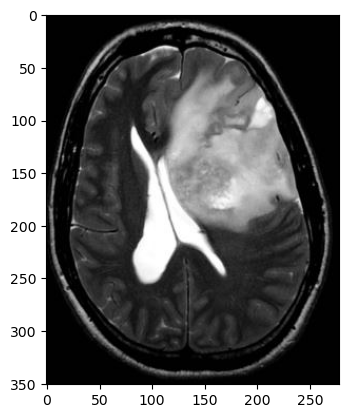

In [155]:
ima=cv2.imread(image_path)
plt.imshow(ima)
plt.show()

In [156]:
reshape_one=cv2.resize(ima,(128,128))

In [157]:
reshape_one=reshape_one/255
reshape_one=reshape_one.reshape(1,128,128,3)

In [158]:
result=model_one.predict(reshape_one)
result=np.argmax(result,axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


In [159]:
if result==1:
    print('Tumor sell')
else:
    print('Normal cell')

Normal cell
